In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from fbprophet import Prophet

In [20]:
df = pd.read_excel('temp maxima.xlsx')
df

,ds,y
0,2015-01-01,-15.5
1,2015-01-02,-6.5
2,2015-01-03,-3.0
3,2015-01-04,0.5
4,2015-01-05,1.0
...,...,...
2187,2020-12-27,1.0
2188,2020-12-28,1.5
2189,2020-12-29,7.0
2190,2020-12-30,6.5


In [21]:
# fit model
m = Prophet()
m.fit(df);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [22]:
#facem predictia cu coloana ds pe viitor cu 365 de zile
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2552,2021-12-27
2553,2021-12-28
2554,2021-12-29
2555,2021-12-30
2556,2021-12-31


In [23]:
# face preveziuni pentru valori joase si valori inalte
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2552,2021-12-27,0.419698,-5.526490,6.422026
2553,2021-12-28,0.117788,-5.439147,6.096215
2554,2021-12-29,-0.423133,-6.503726,5.055126
2555,2021-12-30,-1.124312,-6.589802,4.110368
2556,2021-12-31,-1.380587,-7.557512,4.358423


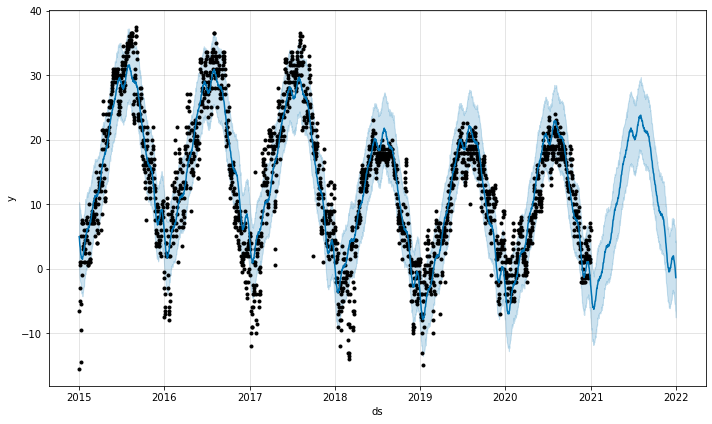

In [24]:
# afisam prognoza
fig1 = m.plot(forecast)
plt.savefig("temperaturi_maxime.png")

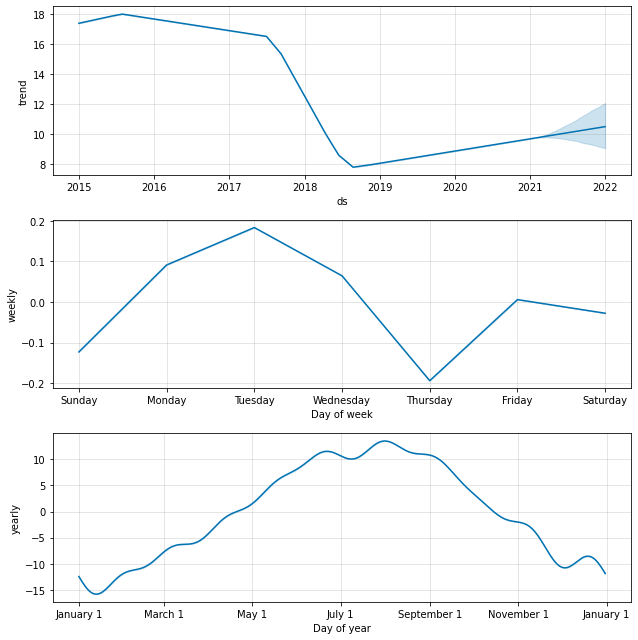

In [25]:
fig2 = m.plot_components(forecast)
plt.savefig("grafic_maxime.png")

In [26]:
import pickle

In [27]:
forecast.to_excel('temperaturi_maxime_prophet.xlsx')

In [28]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,17.383645,-0.047466,10.298840,17.383645,17.383645,-12.422341,-12.422341,-12.422341,-0.193961,-0.193961,-0.193961,-12.228380,-12.228380,-12.228380,0.0,0.0,0.0,4.961304
1,2015-01-02,17.386679,-1.327277,9.977423,17.386679,17.386679,-12.685193,-12.685193,-12.685193,0.005820,0.005820,0.005820,-12.691013,-12.691013,-12.691013,0.0,0.0,0.0,4.701485
2,2015-01-03,17.389713,-1.607287,9.556089,17.389713,17.389713,-13.173025,-13.173025,-13.173025,-0.027785,-0.027785,-0.027785,-13.145240,-13.145240,-13.145240,0.0,0.0,0.0,4.216688
3,2015-01-04,17.392747,-1.800023,9.269220,17.392747,17.392747,-13.706443,-13.706443,-13.706443,-0.123097,-0.123097,-0.123097,-13.583346,-13.583346,-13.583346,0.0,0.0,0.0,3.686304
4,2015-01-05,17.395781,-1.907060,9.068007,17.395781,17.395781,-13.906816,-13.906816,-13.906816,0.091174,0.091174,0.091174,-13.997990,-13.997990,-13.997990,0.0,0.0,0.0,3.488964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2021-12-27,10.485328,-5.526490,6.422026,9.068006,12.027626,-10.065630,-10.065630,-10.065630,0.091174,0.091174,0.091174,-10.156804,-10.156804,-10.156804,0.0,0.0,0.0,0.419698
2553,2021-12-28,10.487556,-5.439147,6.096215,9.064949,12.038605,-10.369768,-10.369768,-10.369768,0.183401,0.183401,0.183401,-10.553169,-10.553169,-10.553169,0.0,0.0,0.0,0.117788
2554,2021-12-29,10.489784,-6.503726,5.055126,9.061892,12.049583,-10.912918,-10.912918,-10.912918,0.064448,0.064448,0.064448,-10.977366,-10.977366,-10.977366,0.0,0.0,0.0,-0.423133
2555,2021-12-30,10.492012,-6.589802,4.110368,9.058835,12.060562,-11.616325,-11.616325,-11.616325,-0.193961,-0.193961,-0.193961,-11.422364,-11.422364,-11.422364,0.0,0.0,0.0,-1.124312
